## Implementação Qiskit


In [1]:
#Required imports

from qiskit import QuantumCircuit, QuantumRegister, Cl
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

ModuleNotFoundError: No module named 'qiskit'

In [2]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.9 MB/s eta 0:00:00


In [3]:
#Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister #Corrected import: Cl to ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

ModuleNotFoundError: No module named 'qiskit_aer'

In [4]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 83.8 MB/s eta 0:00:00


In [5]:
#Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister #Corrected import: Cl to ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

In [7]:
# Implementação de circuito quântico do protocolo de teletransporte.

qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister (1, "a")
b = ClassicalRegister (1, "b")

protocol = QuantumCircuit (qubit, ebit0, ebit1, a, b)

##Prepara o ebit usado para teletransporte
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.cx(qubit, ebit1)
protocol.barrier()

## Operações de Alice
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

## # Alice mede e envia bits clássicos para Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

## Bob usa os bits clássicos para aplicar condicionalmente
with protocol.if_test ((a, 1)):
  protocol.x(ebit1)
with protocol.if_test ((b, 1)):
  protocol.z(ebit1)

display (protocol.draw())




░      ┌───┐ ░    ┌─┐ ░                                »
  Q: ────────────■───░───■──┤ H ├─░────┤M├─░────────────────────────────────»
     ┌───┐       │   ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░                                »
  A: ┤ H ├──■────┼───░─┤ X ├──────░─┤M├─╫──░────────────────────────────────»
     └───┘┌─┴─┐┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌────── ┌───┐ ───────┐ ┌────── »
  B: ─────┤ X ├┤ X ├─░────────────░──╫──╫──░─┤ If-0  ┤ X ├  End-0 ├─┤ If-0  »
          └───┘└───┘ ░            ░  ║  ║  ░ └──╥─── └───┘ ───────┘ └──╥─── »
                                     ║  ║    ┌──╨──┐                   ║    »
a: 1/════════════════════════════════╩══╬════╡ 0x1 ╞═══════════════════╬════»
                                     0  ║    └─────┘                ┌──╨──┐ »
b: 1/═══════════════════════════════════╩═══════════════════════════╡ 0x1 ╞═»
                                        0                           └─────┘ »
«                    
«  Q: ───────────────
«                    
«  A: ───────────────
«     ┌───┐ ───────┐ 
«  B: ┤ Z ├  End-0 ├─
«     └───┘ ───────┘ 
«a: 1/═══════════════
«                    
«b: 1/═══════════════
«

In [8]:
#escolhendo uma porta de qubit unitária.

random_gate = UGate(theta=random.random() * 2 * pi, phi=random.random() * 2 * pi, lam=random.random()
 * 2 * pi)

display (random_gate.to_matrix())

array([[-0.99234848+0.j        , -0.06563359+0.10457881j],
       [-0.05910368-0.10840318j,  0.99048461+0.06079258j]])

In [9]:
# Cria um novo circuito incluindo os mesmos bits que
# protocolo de teletransporte.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

In [10]:
# Comece com o portão selecionado aleatoriamente em Q
test.append(random_gate, qubit)
test.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'Q'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

In [11]:
# Anexe todo o protocolo de teletransporte acima

test = test.compose(protocol)
test.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'Q'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

In [12]:
# Finalmente, aplique o inverso do unitário aleatório para
test.append(random_gate.inverse(), ebit1)
result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)
display(test.draw())

┌─────────────────────────┐ ░                 ░      ┌───┐ ░    ┌─┐»
       Q: ┤ U(6.0356,4.2132,5.2729) ├─░─────────────■───░───■──┤ H ├─░────┤M├»
          └─────────────────────────┘ ░ ┌───┐       │   ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘»
       A: ────────────────────────────░─┤ H ├──■────┼───░─┤ X ├──────░─┤M├─╫─»
                                      ░ └───┘┌─┴─┐┌─┴─┐ ░ └───┘      ░ └╥┘ ║ »
       B: ────────────────────────────░──────┤ X ├┤ X ├─░────────────░──╫──╫─»
                                      ░      └───┘└───┘ ░            ░  ║  ║ »
     a: 1/══════════════════════════════════════════════════════════════╩══╬═»
                                                                        0  ║ »
     b: 1/═════════════════════════════════════════════════════════════════╩═»
                                                                           0 »
Result: 1/═══════════════════════════════════════════════════════════════════»
                                                                             »
«           ░                                                ░ »
«       Q: ─░────────────────────────────────────────────────░─»
«           ░                                                ░ »
«       A: ─░────────────────────────────────────────────────░─»
«           ░ ┌────── ┌───┐ ───────┐ ┌────── ┌───┐ ───────┐  ░ »
«       B: ─░─┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├  End-0 ├──░─»
«           ░ └──╥─── └───┘ ───────┘ └──╥─── └───┘ ───────┘  ░ »
«             ┌──╨──┐                   ║                      »
«     a: 1/═══╡ 0x1 ╞═══════════════════╬══════════════════════»
«             └─────┘                ┌──╨──┐                   »
«     b: 1/══════════════════════════╡ 0x1 ╞═══════════════════»
«                                    └─────┘                   »
«Result: 1/════════════════════════════════════════════════════»
«                                                              »
«                                           
«       Q: ─────────────────────────────────
«                                           
«       A: ─────────────────────────────────
«          ┌────────────────────────────┐┌─┐
«       B: ┤ U(-6.0356,-5.2729,-4.2132) ├┤M├
«          └────────────────────────────┘└╥┘
«     a: 1/═══════════════════════════════╬═
«                                         ║ 
«     b: 1/═══════════════════════════════╬═
«                                         ║ 
«Result: 1/═══════════════════════════════╩═
«                                         0

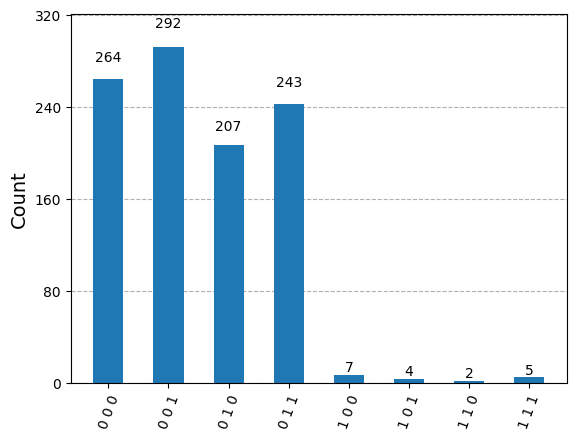

In [13]:
#executando o simulador Aer neste circuit

result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

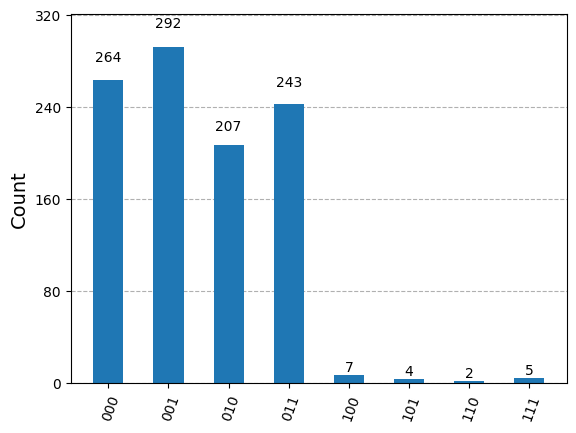

In [15]:
#filtrando as estatísticas para focar apenas no qubit do resultado do teste.

filtered_statistics = marginal_distribution(statistics)
display(plot_histogram(filtered_statistics))